<div style="text-align: justify">
    The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table. In this my personal project, I will do exploratory data analysis to know customer behaviour and predict the price of avocado using regression method. The dataset take from <a href='https://www.kaggle.com/neuromusic/avocado-prices'>Kaggle</a>.
</div>

Some relevant columns in the dataset:
- <code>Date</code> - The date of the observation
- <code>AveragePrice</code> - the average price of a single avocado
- <code>type</code> - conventional or organic
- <code>year</code> - the year
- <code>Region</code> - the city or region of the observation
- <code>Total Volume</code> - Total number of avocados sold
- <code>4046</code> - Total number of avocados with PLU 4046 sold
- <code>4225</code> - Total number of avocados with PLU 4225 sold
- <code>4770</code> - Total number of avocados with PLU 4770 sold

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('avocado.csv')
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


## Data Acquisition, Setup, and Cleansing

In [3]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
df.shape

(18249, 13)

In [7]:
pd.set_option('precision', 3)
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000,1.825e+04,1.825e+04,1.825e+04,1.825e+04,1.825e+04,1.825e+04,1.825e+04,18249.000,18249.000
mean,1.406,8.506e+05,2.930e+05,2.952e+05,2.284e+04,2.396e+05,1.822e+05,5.434e+04,3106.427,2016.148
std,0.403,3.454e+06,1.265e+06,1.204e+06,1.075e+05,9.862e+05,7.462e+05,2.440e+05,17692.895,0.940
min,0.440,8.456e+01,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000,2015.000
25%,1.100,1.084e+04,8.541e+02,3.009e+03,0.000e+00,5.089e+03,2.849e+03,1.275e+02,0.000,2015.000
50%,1.370,1.074e+05,8.645e+03,2.906e+04,1.850e+02,3.974e+04,2.636e+04,2.648e+03,0.000,2016.000
75%,1.660,4.330e+05,1.110e+05,1.502e+05,6.243e+03,1.108e+05,8.334e+04,2.203e+04,132.500,2017.000
max,3.250,6.251e+07,2.274e+07,2.047e+07,2.546e+06,1.937e+07,1.338e+07,5.719e+06,551693.650,2018.000


In [8]:
df.skew()

AveragePrice     0.580
Total Volume     9.008
4046             8.648
4225             8.942
4770            10.159
Total Bags       9.756
Small Bags       9.541
Large Bags       9.796
XLarge Bags     13.140
year             0.215
dtype: float64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [10]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [11]:
df['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [12]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [13]:
df['region'].nunique()

54

In [14]:
df['region'].value_counts().sort_index()

Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
R

In [15]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000,-0.193,-0.208,-0.173,-0.179,-0.177,-0.175,-0.173,-0.118,0.093
Total Volume,-0.193,1.000,0.978,0.974,0.872,0.963,0.967,0.881,0.747,0.017
4046,-0.208,0.978,1.000,0.926,0.833,0.920,0.925,0.839,0.699,0.003
4225,-0.173,0.974,0.926,1.000,0.888,0.906,0.916,0.810,0.689,-0.010
4770,-0.179,0.872,0.833,0.888,1.000,0.792,0.803,0.698,0.680,-0.037
Total Bags,-0.177,0.963,0.920,0.906,0.792,1.000,0.994,0.943,0.804,0.072
Small Bags,-0.175,0.967,0.925,0.916,0.803,0.994,1.000,0.903,0.807,0.064
Large Bags,-0.173,0.881,0.839,0.810,0.698,0.943,0.903,1.000,0.711,0.088
XLarge Bags,-0.118,0.747,0.699,0.689,0.680,0.804,0.807,0.711,1.000,0.081
year,0.093,0.017,0.003,-0.010,-0.037,0.072,0.064,0.088,0.081,1.000


In [16]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

## Data Visualization

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


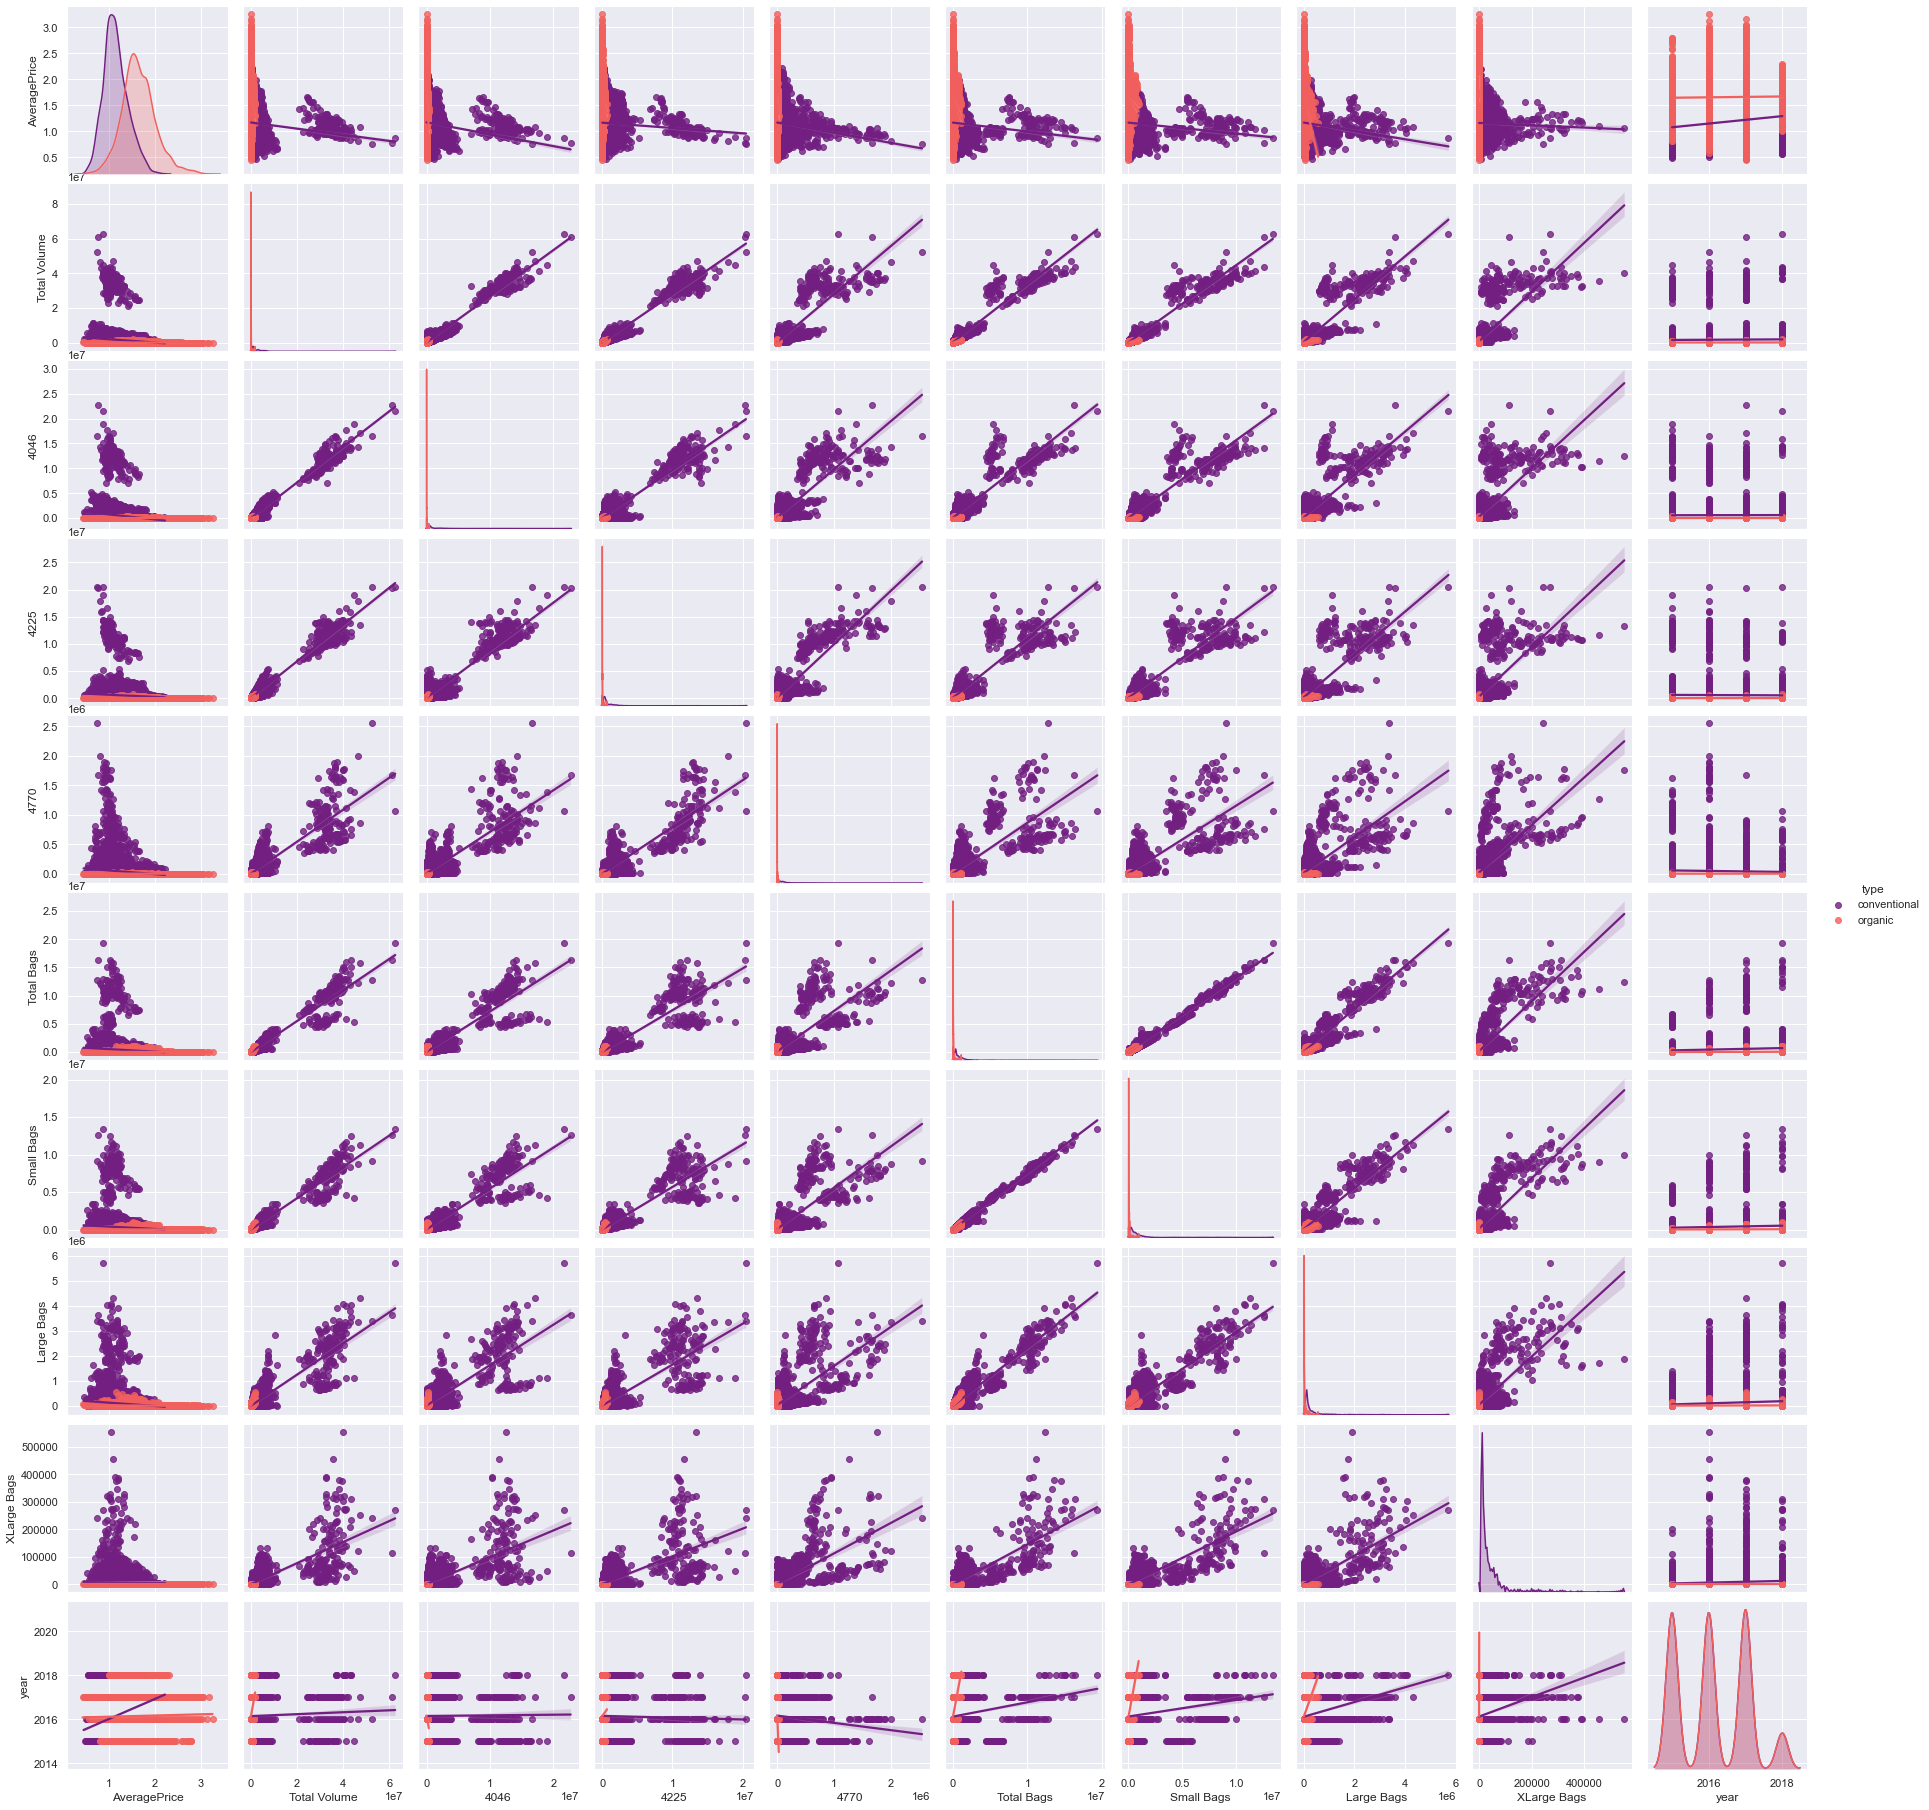

In [17]:
sns.pairplot(df.drop('Date', axis=1), hue='type', kind='reg', palette='magma')

In [18]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Average Price'),
 Text(0.5, 1.0, 'Probability Distributions of Average Price')]

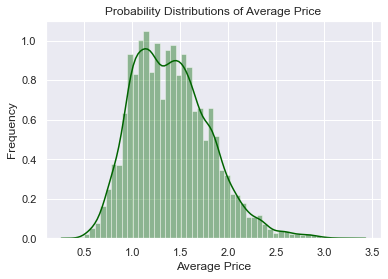

In [19]:
sns.distplot(df['AveragePrice'], color='darkgreen').set(title='Probability Distributions of Average Price',
                                                        xlabel='Average Price', ylabel='Frequency')

[Text(0, 0.5, 'Frequency'),
 Text(0.5, 0, 'Total Volume'),
 Text(0.5, 1.0, 'Probability Distributions of Average Price')]

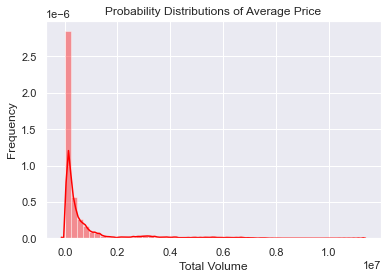

In [20]:
filtered = df[df['region']!='TotalUS']
sns.distplot(filtered['Total Volume'], color='red').set(title='Probability Distributions of Average Price',
                                                        xlabel='Total Volume', ylabel='Frequency')

Text(0.5, 1.0, 'Number of Avocado Based on Type')

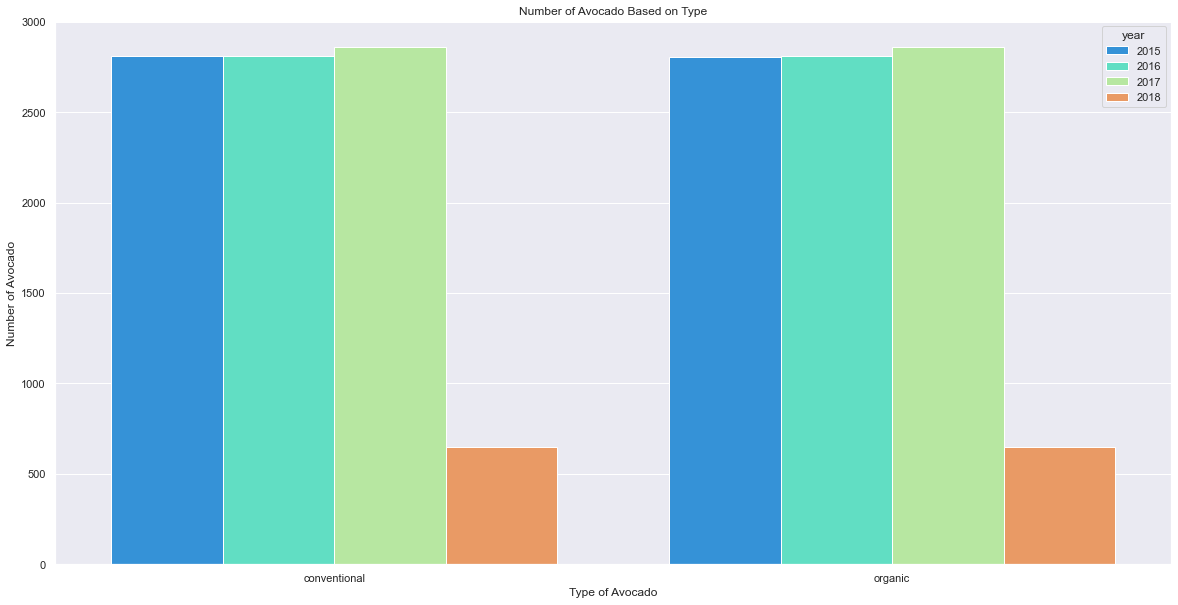

In [21]:
plt.figure(figsize=[20,10])
sns.countplot(x='type', data=df, palette='rainbow', hue='year')
plt.xlabel('Type of Avocado')
plt.ylabel('Number of Avocado')
plt.title('Number of Avocado Based on Type')

Text(0.5, 1.0, 'Number of Avocado Based on Type')

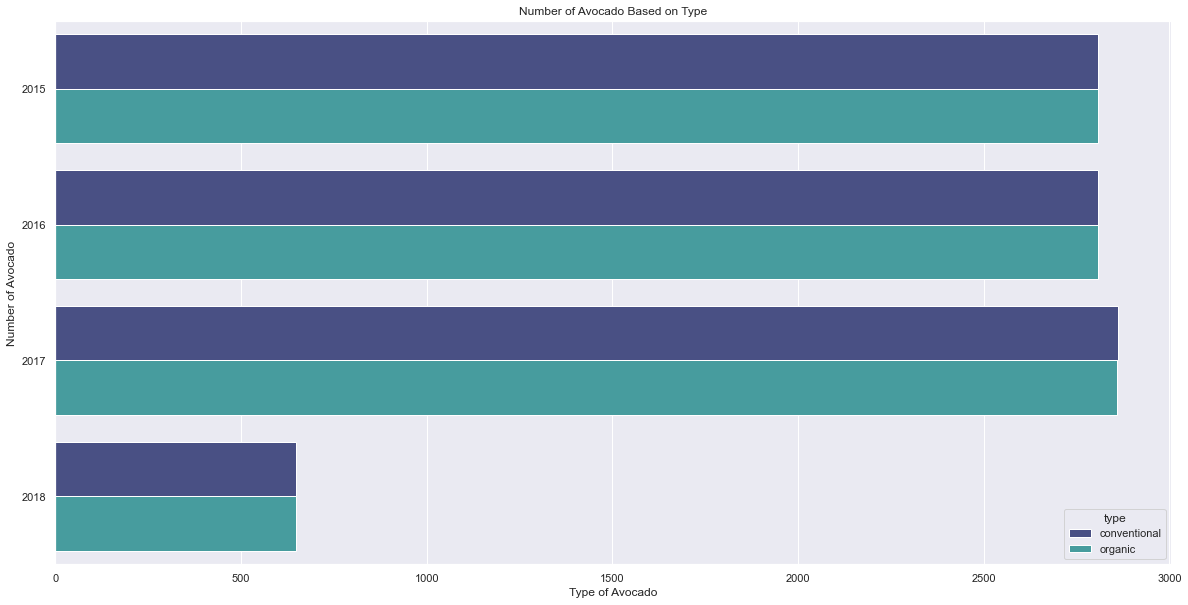

In [22]:
plt.figure(figsize=[20,10])
sns.countplot(y='year', data=df, palette='mako', hue='type')
plt.xlabel('Type of Avocado')
plt.ylabel('Number of Avocado')
plt.title('Number of Avocado Based on Type')

Text(0, 0.5, 'Average Price')

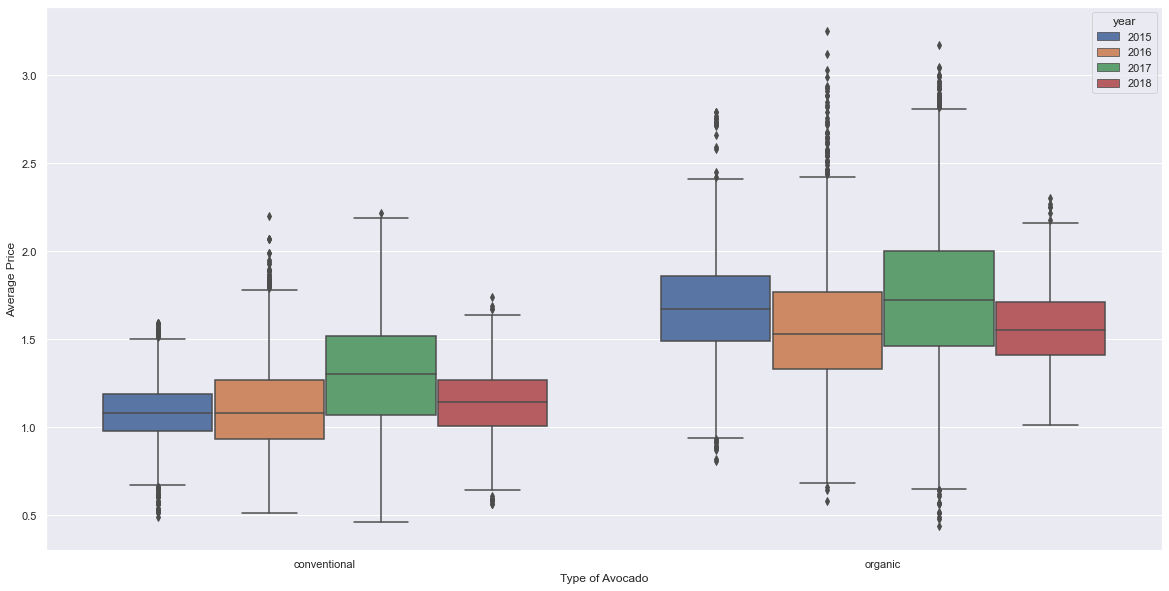

In [23]:
plt.figure(figsize=[20,10])
sns.boxplot(x='type', y='AveragePrice', data=df, hue='year')
plt.xlabel('Type of Avocado')
plt.ylabel('Average Price')

#### Average Price of Avocado Based on Region

In [24]:
reg_list = df['region'].unique()
avg_price = []
for i in reg_list:
    x = df[df['region']==i]
    reg_avg = x['AveragePrice'].sum()/len(x)
    avg_price.append(reg_avg)

In [25]:
df_avgprice_reg = pd.DataFrame({'region': reg_list, 'Avg_Price_reg': avg_price})
df_avgprice_reg.head()

,region,Avg_Price_reg
0,Albany,1.561
1,Atlanta,1.338
2,BaltimoreWashington,1.534
3,Boise,1.348
4,Boston,1.531


In [26]:
df_avgprice_sort = df_avgprice_reg.sort_values(by=['Avg_Price_reg'], ascending=False).reset_index()
df_avgprice_sort.drop('index', axis=1, inplace=True)
df_avgprice_sort.head()

,region,Avg_Price_reg
0,HartfordSpringfield,1.819
1,SanFrancisco,1.804
2,NewYork,1.728
3,Philadelphia,1.632
4,Sacramento,1.622


Text(0.5, 1.0, 'Average Price of Avocado Based on Region')

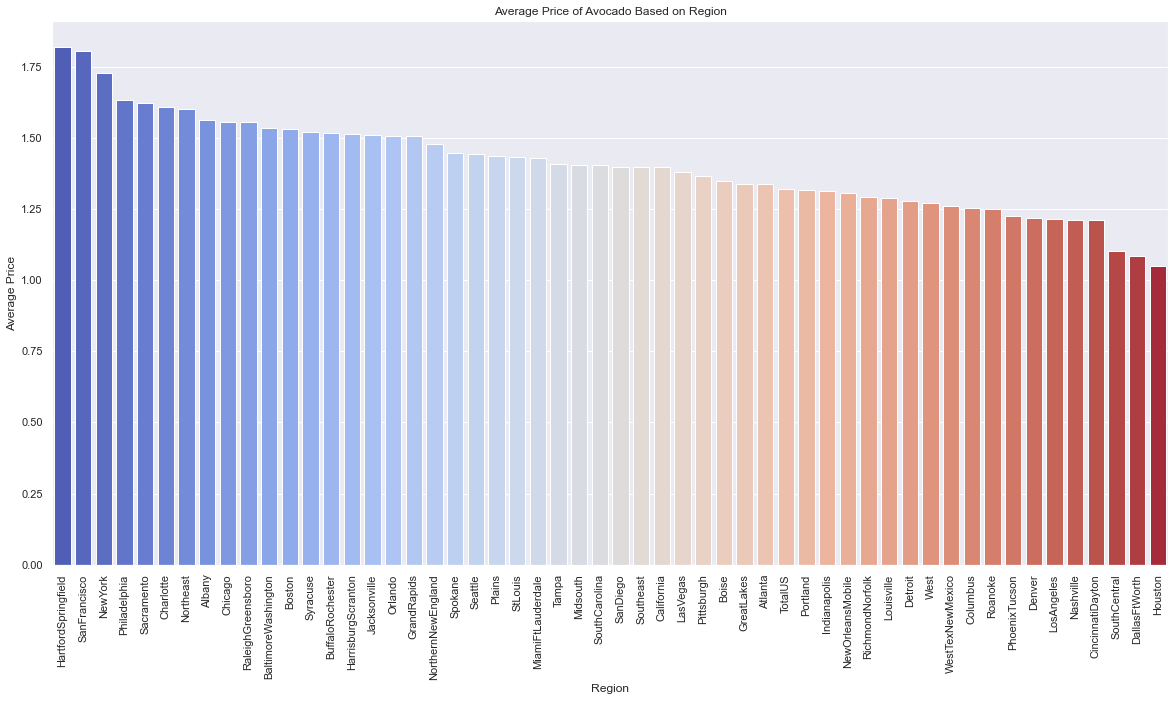

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x='region', y='Avg_Price_reg', data=df_avgprice_sort, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado Based on Region')

#### Average Price of Avocado Based on Type

In [28]:
type_list = df['type'].unique()
avg_price_type = []

for i in type_list:
    y=df[df['type']==i]
    type_avg = y['AveragePrice'].sum()/len(y)
    avg_price_type.append(type_avg)

In [29]:
df_avgprice_type = pd.DataFrame({'type':type_list, 'Avg_Price_type':avg_price_type})
df_avgprice_type.head()

,type,Avg_Price_type
0,conventional,1.158
1,organic,1.654


Text(0.5, 1.0, 'Average of Total Volume Based on Region')

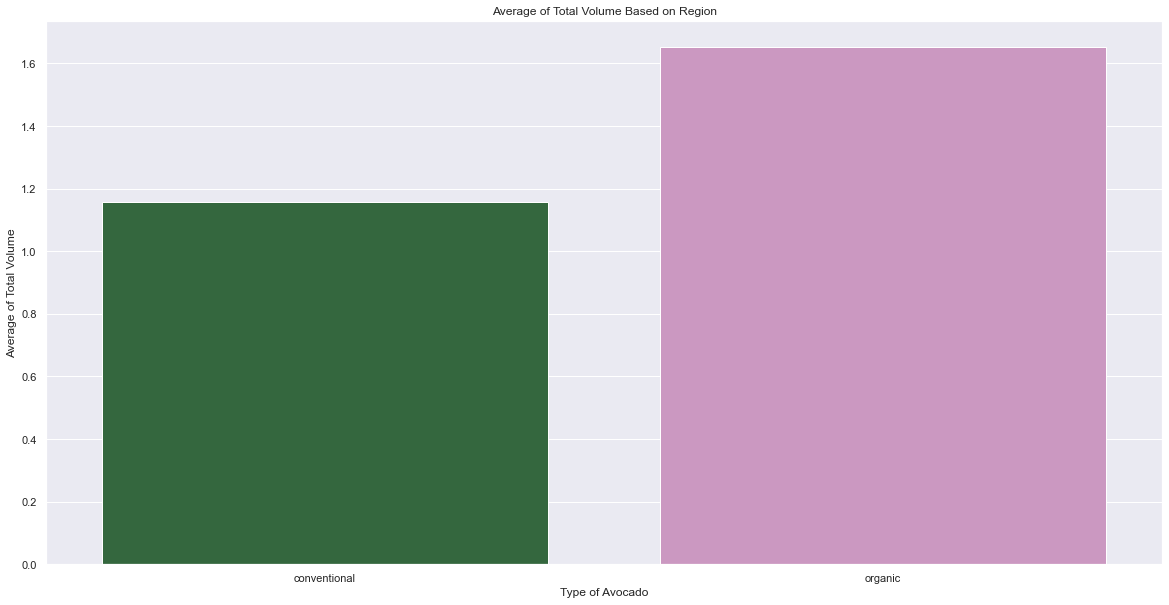

In [30]:
plt.figure(figsize=(20,10))
sns.barplot(x='type', y='Avg_Price_type', data=df_avgprice_type, palette='cubehelix')
plt.xlabel('Type of Avocado')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume Based on Region')

#### Total Volume of Avocado Based on Region

In [31]:
data_filter = df[df['region']!='TotalUS']

reg_list = data_filter['region'].unique()
totvol_reg = []
for i in reg_list:
    x = df[df['region']==i]
    totvol_avg_reg = x['Total Volume'].sum()/len(x)
    totvol_reg.append(totvol_avg_reg)

In [32]:
df_totvol_reg = pd.DataFrame({'region':reg_list, 'total_vol_avg_reg':totvol_reg})
df_totvol_reg.head()

,region,total_vol_avg_reg
0,Albany,47537.870
1,Atlanta,262145.322
2,BaltimoreWashington,398561.891
3,Boise,42642.567
4,Boston,287792.855


In [33]:
df_totvol_reg_sort = df_totvol_reg.sort_values(by=['total_vol_avg_reg'], ascending=False).reset_index()
df_totvol_reg_sort.drop('index', axis=1, inplace=True)
df_totvol_reg_sort.head()

,region,total_vol_avg_reg
0,West,3.215e+06
1,California,3.044e+06
2,SouthCentral,2.992e+06
3,Northeast,2.110e+06
4,Southeast,1.820e+06


Text(0.5, 1.0, 'Average of Total Volume Based on Region')

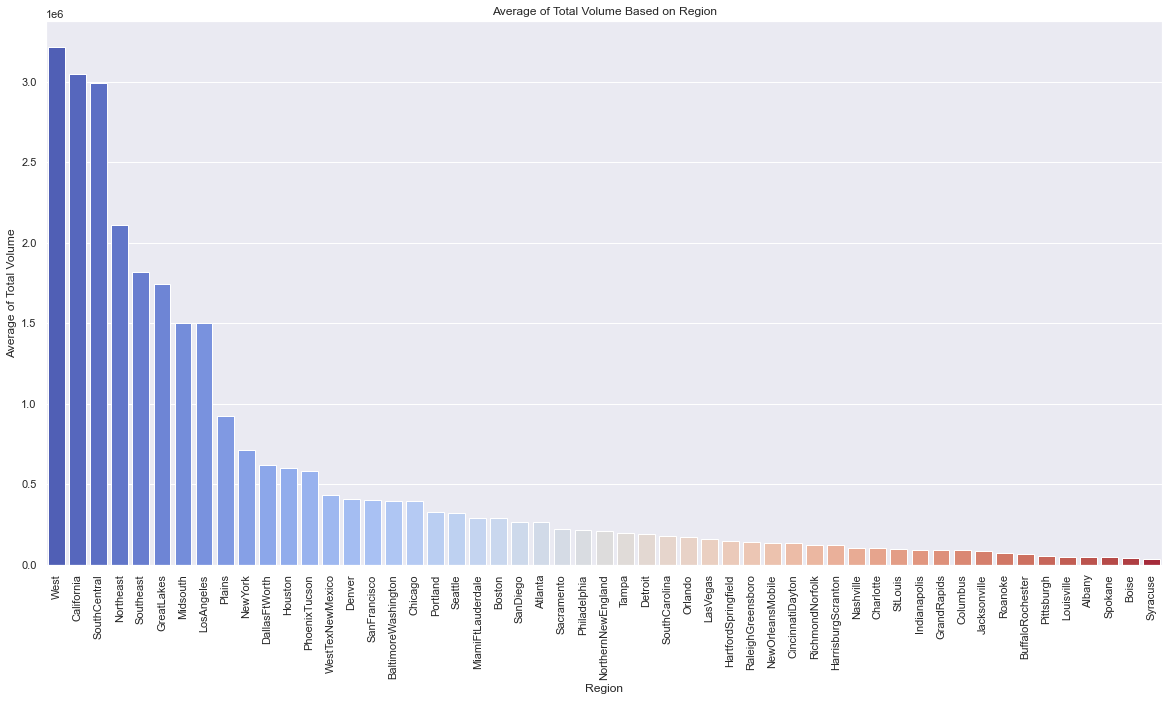

In [34]:
plt.figure(figsize=(20,10))
sns.barplot(x='region', y='total_vol_avg_reg', data=df_totvol_reg_sort, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume Based on Region')

#### Total Volume of Avocado Based on Type

In [35]:
type_list = df['type'].unique()
totvol_type = []

for i in type_list:
    y=df[df['type']==i]
    totvol_avg_type = y['Total Volume'].sum()/len(y)
    totvol_type.append(totvol_avg_type)

In [36]:
df_totvol_type = pd.DataFrame({'type':type_list, 'total_avg_type':totvol_type})
df_totvol_type.head()

,type,total_avg_type
0,conventional,1.653e+06
1,organic,4.781e+04


Text(0.5, 1.0, 'Average of Total Volume Based on Type')

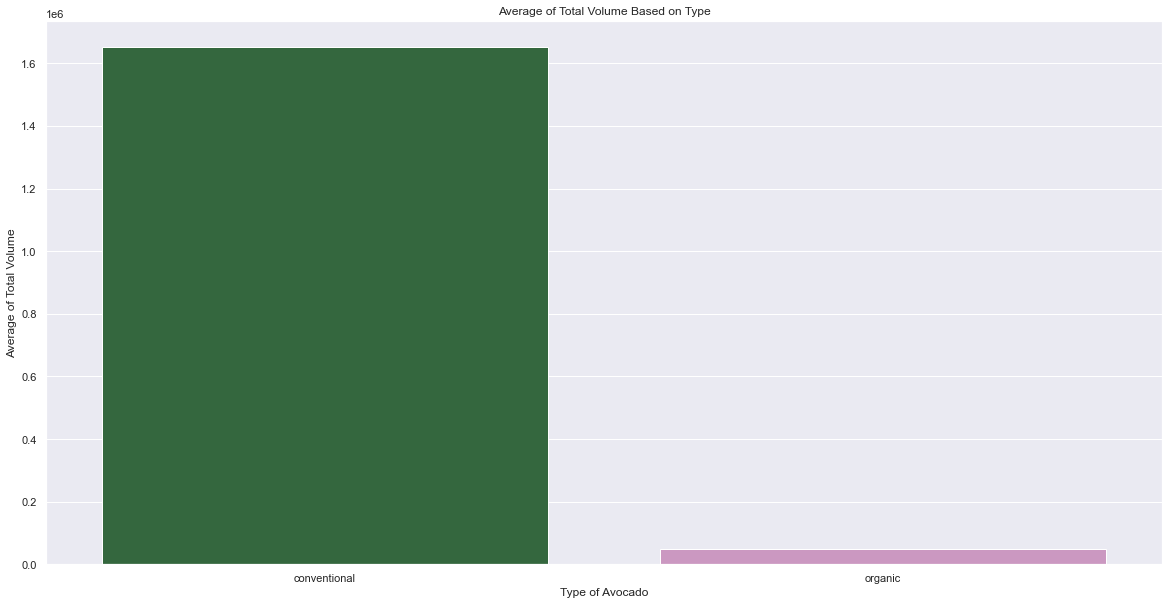

In [37]:
plt.figure(figsize=(20,10))
sns.barplot(x='type', y='total_avg_type', data=df_totvol_type, palette='cubehelix')
plt.xlabel('Type of Avocado')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume Based on Type')

#### Average of Each Bag

In [38]:
small = []
large = []
xlarge = []

for i in reg_list:
    z=df[df['region']==i]
    sm = z['Small Bags'].sum()/len(z)
    la = z['Large Bags'].sum()/len(z)
    xl = z['XLarge Bags'].sum()/len(z)
    small.append(sm)
    large.append(la)
    xlarge.append(xl)

df_sml = pd.DataFrame({'region':reg_list, 'small':small, 'large':large, 'xlarge':xlarge})

Text(49, 15000, 'Xlarge Bags')

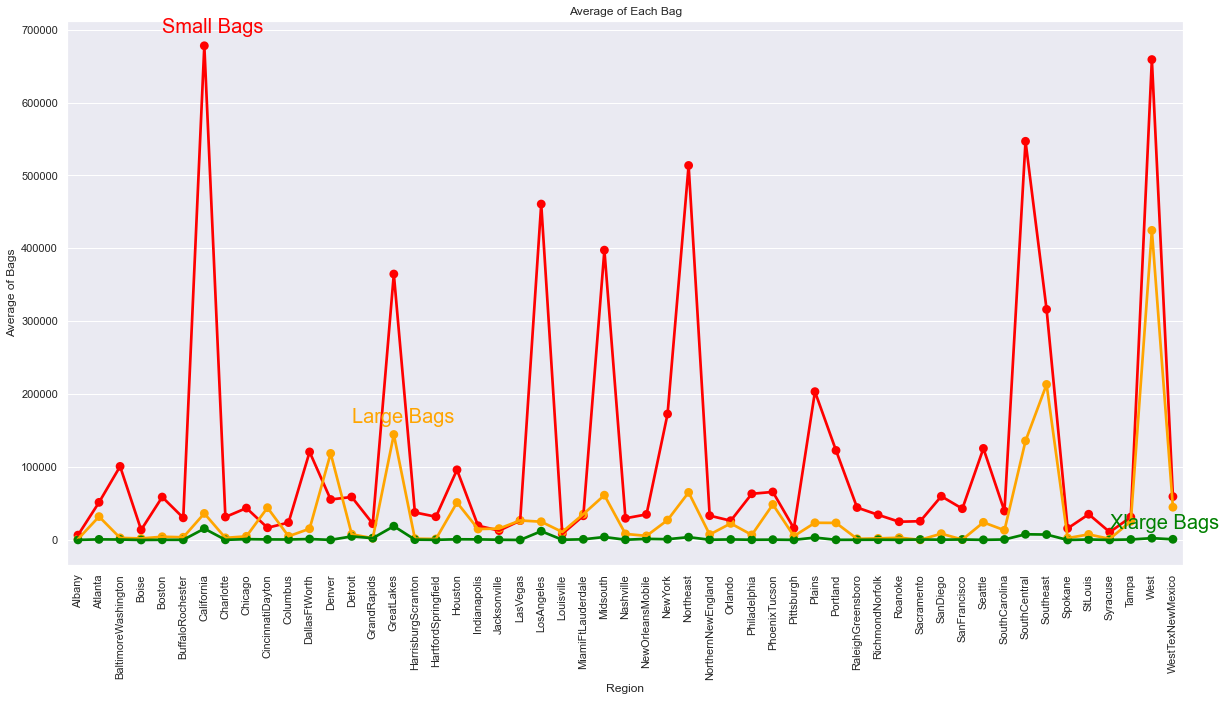

In [39]:
f, axes = plt.subplots(figsize=(20,10))
sns.pointplot(x='region', y='small', data=df_sml, color='red')
sns.pointplot(x='region', y='large', data=df_sml, color='orange')
sns.pointplot(x='region', y='xlarge', data=df_sml, color='green')

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Bags')
plt.title('Average of Each Bag')
#plt.legend()
plt.text(4, 695000, 'Small Bags', color='red', fontsize=20)
plt.text(13, 160000, 'Large Bags', color='Orange', fontsize=20)
plt.text(49, 15000, 'Xlarge Bags', color='green', fontsize=20)

#### Relationship between Average Price and Total Volume Based on Region

In [40]:
df_avgreg = df_avgprice_reg.merge(df_totvol_reg, how='inner', on='region')
df_avgreg.head()

,region,Avg_Price_reg,total_vol_avg_reg
0,Albany,1.561,47537.870
1,Atlanta,1.338,262145.322
2,BaltimoreWashington,1.534,398561.891
3,Boise,1.348,42642.567
4,Boston,1.531,287792.855


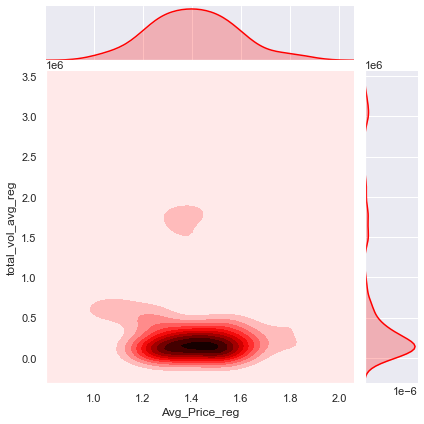

In [41]:
sns.jointplot(x='Avg_Price_reg', y='total_vol_avg_reg', data=df_avgreg,
              kind='kde', color='red')

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

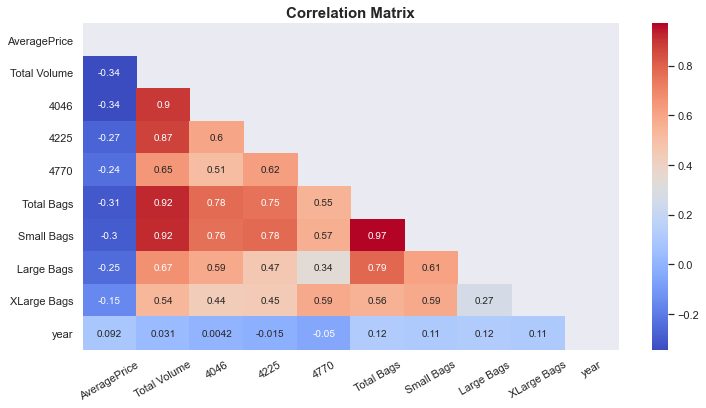

In [42]:
cor = filtered.corr()

mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,6))
sns.heatmap(cor, cmap='coolwarm', annot=True, mask=mask)
plt.xlim(0,10)
plt.ylim(10,0)
plt.title('Correlation Matrix', size=15, weight='bold')
plt.xticks(rotation=30)

Changing the price format to log format

In [43]:
log_price = np.log(filtered['AveragePrice'])
filtered['log_avgprice'] = log_price
filtered.head()

<ipython-input-43-d11606103342>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['log_avgprice'] = log_price


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,log_avgprice
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,0.285
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,0.300
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,-0.073
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,0.077
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,0.247


## Data Modeling

In [78]:
x = filtered.drop(['Date', 'AveragePrice', 'Total Volume', 'type', 'year', 'region'], axis=1)
y = filtered['Total Volume']

In [79]:
x.head()

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,log_avgprice
0,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0.285
1,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0.300
2,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,-0.073
3,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0.077
4,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0.247


In [80]:
pd.DataFrame(y).head()

,Total Volume
0,64236.62
1,54876.98
2,118220.22
3,78992.15
4,51039.60


### Scalling

In [81]:
scale = StandardScaler()
scale.fit(x)
scale_feat = scale.transform(x)

In [82]:
header_new = x.columns.values

In [83]:
x_new = pd.DataFrame(scale_feat)
x_new.columns = header_new
x_new.head()

,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,log_avgprice
0,-0.355,-0.296,-0.297,-0.395,-0.386,-0.302,-0.24,-0.053
1,-0.356,-0.318,-0.297,-0.393,-0.383,-0.302,-0.24,-0.001
2,-0.355,-0.175,-0.295,-0.396,-0.388,-0.302,-0.24,-1.283
3,-0.355,-0.257,-0.297,-0.403,-0.397,-0.302,-0.24,-0.769
4,-0.355,-0.319,-0.297,-0.402,-0.395,-0.301,-0.24,-0.184


### Train Test Split

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.25, random_state=10)
print('Train set: ', x_train.shape, y_train.shape)
print('Test set: ', x_test.shape, y_test.shape)

Train set:  (13433, 8) (13433,)
Test set:  (4478, 8) (4478,)


## Linear Regression Model for Total Volume of Avocado

### Creating and Training Model

In [85]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

### Train Data

In [86]:
lr_pred_train = lr.predict(x_train)
lr_pred_train[0:5]

array([252854.06535794,   4648.94877379, 156138.76290013, 276002.88838161,
        21390.9559811 ])

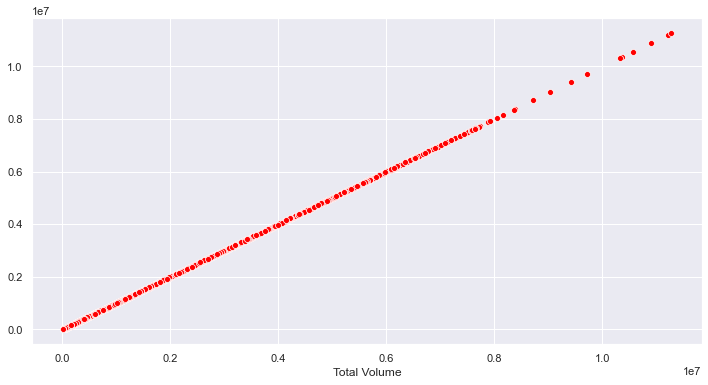

In [87]:
plt.figure(figsize=(12,6))
sns.scatterplot(y_train, lr_pred_train, color='red')

In [88]:
lr_pred_train[0:5]

array([252854.06535794,   4648.94877379, 156138.76290013, 276002.88838161,
        21390.9559811 ])

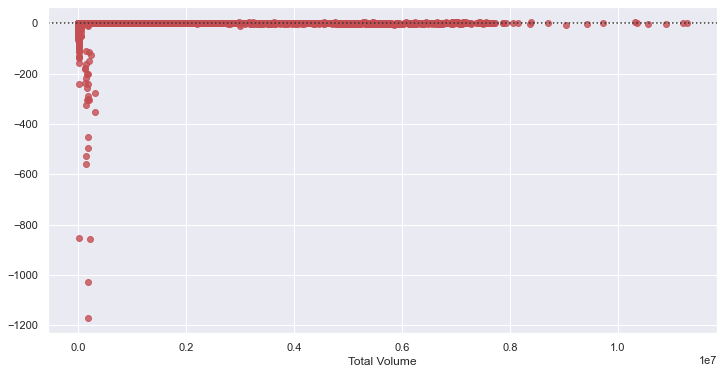

In [89]:
plt.figure(figsize=(12,6))
sns.residplot(y_train, lr_pred_train, color='r')

In [90]:
lr.score(x_train, y_train)

0.9999999996857468

### Test Data

In [91]:
lr_pred_test = lr.predict(x_test)
lr_pred_test[0:5]

array([ 749511.89651921,    5225.82550439,   48366.00278974,
          9400.6495341 , 4405344.82367863])

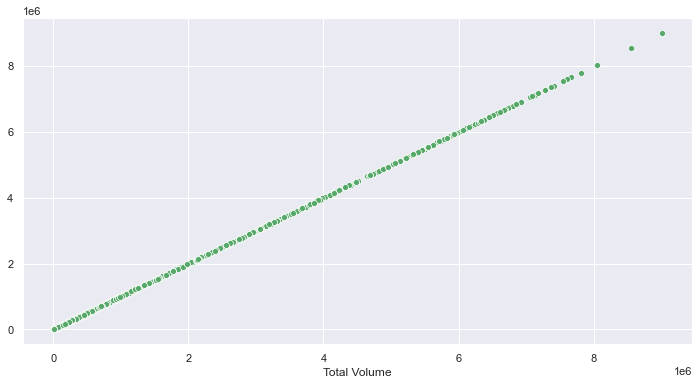

In [92]:
plt.figure(figsize=(12,6))
sns.scatterplot(y_test, lr_pred_test, color='g')

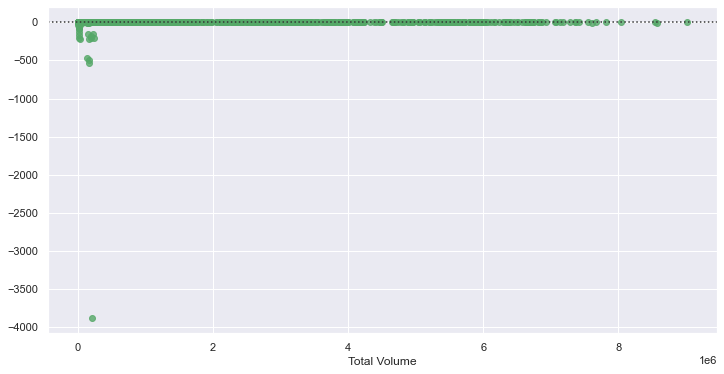

In [93]:
plt.figure(figsize=(12,6))
sns.residplot(y_test, lr_pred_test, color='g')

In [94]:
lr.score(x_test, y_test)

0.9999999975385967

### Finding Std, Bias, and Weight

In [95]:
lr.intercept_

0.7208818385843188

In [96]:
lr.coef_

array([0.99999912, 0.99999887, 1.00000031, 0.73395767, 0.26604533,
       0.26604238, 0.26600989, 1.25001803])

In [97]:
summary = pd.DataFrame(data=x.columns.values, columns=['Features'])
summary['Weight'] = lr.coef_
summary

,Features,Weight
0,4046,1.000
1,4225,1.000
2,4770,1.000
3,Total Bags,0.734
4,Small Bags,0.266
5,Large Bags,0.266
6,XLarge Bags,0.266
7,log_avgprice,1.250


### Evaluation

In [98]:
print('MAE (Mean Absolute Error): ', metrics.mean_absolute_error(y_test, lr_pred_test))
print('MSE (Mean Squared Error): ', metrics.mean_squared_error(y_test, lr_pred_test))
print('RMSE (Root Mean Squared Error): ', np.sqrt(metrics.mean_squared_error(y_test, lr_pred_test)))

MAE (Mean Absolute Error):  2.8746899253402862
MSE (Mean Squared Error):  3624.8506720962264
RMSE (Root Mean Squared Error):  60.206732780447624


## Using Pipeline

In [109]:
Input = [('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x_train, y_train)
ypipe=pipe.predict(x_new)
ypipe[0:10]

array([ 64237.66051576,  54878.05304465, 118220.74982346,  78992.90150478,
        51040.5969025 ,  55980.75390358,  83454.40817464, 109428.92836348,
        99812.09904976,  74339.51550968])

### Compare Result of Predict from Real and Predict

In [110]:
ypipe = pd.DataFrame(ypipe, columns=['Total Volume Pipeline'])
ypipe.sort_values(['Total Volume Pipeline']).head()

,Total Volume Pipeline
10212,85.861
9268,381.227
12968,386.844
11529,421.599
12972,474.041


In [101]:
lr_pred_test = pd.DataFrame(lr_pred_test)
lr_pred_train = pd.DataFrame(lr_pred_train)
data_new = pd.concat([lr_pred_test, lr_pred_train])
data_new.rename(columns={0:'Total Volume Predict'}, inplace=True)
data_new.sort_values(['Total Volume Predict']).head()

,Total Volume Predict
3053,85.861
10400,381.227
983,386.844
5764,421.599
3003,474.041


In [102]:
real_data = pd.DataFrame(y)
real_data.rename(columns={'Total Volume':'Total Volume Real'}, inplace=True)
real_data.sort_values(['Total Volume Real']).head()

,Total Volume Real
10381,84.56
9437,379.82
13189,385.55
11698,419.98
13193,472.82
